In [7]:
%pip install --user pandas scipy numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import time
import numpy as np
from scipy.stats import chisquare
import collections
import math
import matplotlib.pyplot as plt
import glob
import bz2
import os

#### Data preparation

In [9]:
# Define a function to extract the leading digit from a string
def get_leading_digit(s):
    return int(s[0])

# Initialize a counter for the leading digits
leading_digits = collections.Counter()

# Retrieve all .trans files, change if needed
filenames = glob.glob('/mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/*.trans.bz2')
filenames = sorted(filenames)

# ## For sample input
# # get current repository
# current_directory = os.getcwd()
# filenames = glob.glob(os.path.join(current_directory, '*.trans.bz2'))

# Loop over the filenames
for filename in filenames:
    # Track the process of data reading
    print("Reading file: ", filename)

    # Open the file
    with bz2.open(filename, 'r') as file:
        # Loop over the lines in the file
        for line in file:
            # Decode the line to a string
            line = line.decode('utf-8')

            # Split the line on spaces (or appropriate delimiter)
            data = line.strip().split()
            
            # Extract the leading digit from the third column and update the counter
            leading_digits.update([get_leading_digit(data[2])])
                
# Count the frequency of each leading digit
observed_frequencies = dict(sorted(leading_digits.items()))
print(observed_frequencies)

# Calculate the total count of leading digits
total_count = sum(leading_digits.values())

Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00000-00100.trans.bz2


Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00100-00200.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00200-00300.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00300-00400.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00400-00500.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00500-00600.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00600-00700.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00700-00800.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00800-00900.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__00900-01000.trans.bz2
Reading file:  /mnt/data/exomol/exomo

#### Plot bar chat comparing the first digits of the observed (dataset) with the expected (Benford's Law) with Chi-square results

Chi-square statistic for Benford's Law expected frequency: 14829.83583227482
P-value for Benford's Law expected frequency: 0.0


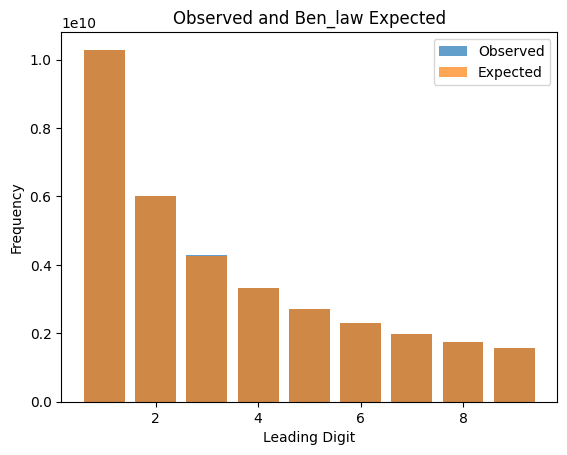

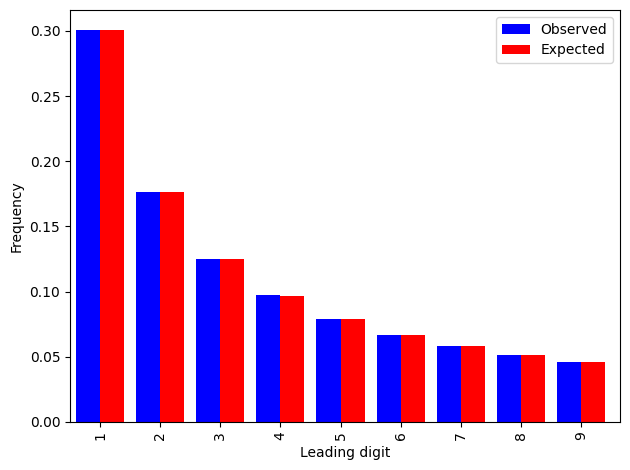

In [10]:
# Calculate the expected frequency for each leading digit under the assumption of Benford's Law
expected_frequencies_ben = {i: total_count * math.log10(1 + 1/i) for i in range(1, 10)}

# Perform a chi-square test
chi2_ben, p_ben = chisquare(list(observed_frequencies.values()), list(expected_frequencies_ben.values()))

# Print the results for Benford's Law
print(f"Chi-square statistic for Benford's Law expected frequency: {chi2_ben}")
print(f"P-value for Benford's Law expected frequency: {p_ben}")

# Create a bar plot for Benford's Law
plt.title('Observed and Ben_law Expected')
plt.bar(range(1, 10), [observed_frequencies[i] for i in range(1, 10)], alpha=0.7, label='Observed')
plt.bar(range(1, 10), [expected_frequencies_ben[i] for i in range(1, 10)], alpha=0.7, label='Expected')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Convert the frequencies to ratios
observed_ratios = {k: v / total_count for k, v in observed_frequencies.items()}

# Calculate expected frequencies according to Benford's law
expected_frequencies = {i: math.log10(1 + 1 / i) for i in range(1, 10)}

# Create a dataframe from the observed and expected ratios
df = pd.DataFrame({'observed': observed_ratios, 'expected': expected_frequencies})

# Create a bar plot
fig, ax = plt.subplots()
df['observed'].plot(kind='bar', color='blue', ax=ax, width=0.4, position=1, label='Observed')
df['expected'].plot(kind='bar', color='red', ax=ax, width=0.4, position=0, label='Expected')

ax.set_xlabel('Leading digit')
ax.set_ylabel('Frequency')
ax.set_xlim(left=-0.5)  
plt.tight_layout() 
plt.legend()
plt.show()

#### MAD tests

In [11]:
# Calculate the absolute deviation between the observed and expected ratios
df['absolute_difference'] = abs(df['observed'] - df['expected'])

# Print the absolute_deviation
print(df['absolute_difference'])

# Print Max and Min absolute_deviation
max_absolute_difference = df['absolute_difference'].max()
min_absolute_difference = df['absolute_difference'].min()
print(f'Max absolute difference: {max_absolute_difference}')
print(f'Min absolute difference: {min_absolute_difference}')

# Calculate and print the mean absolute_deviation
mean_absolute_difference = df['absolute_difference'].mean()
print(f'Mean absolute difference: {mean_absolute_difference}')

# Calculate and print Correlation between Observed and Expected Frequencies
correlation = df['observed'].corr(df['expected'])
print(f'Correlation: {correlation}')

1    0.000209
2    0.000085
3    0.000120
4    0.000075
5    0.000029
6    0.000004
7    0.000022
8    0.000032
9    0.000041
Name: absolute_difference, dtype: float64
Max absolute difference: 0.00020921439392596053
Min absolute difference: 3.5619941937542476e-06
Mean absolute difference: 6.841402750074055e-05
Correlation: 0.9999994494126879


#### Z-statistic 

Z-statistic for 1: -84.31087537313472
Z-statistic for 2: 41.02717148823948
Z-statistic for 3: 66.96464085294046
Z-statistic for 4: 46.66658901278457
Z-statistic for 5: 19.75688443826975
Z-statistic for 6: -2.634518890786528
Z-statistic for 7: -17.565969195980355
Z-statistic for 8: -27.06563365059949
Z-statistic for 9: -35.933402176188196


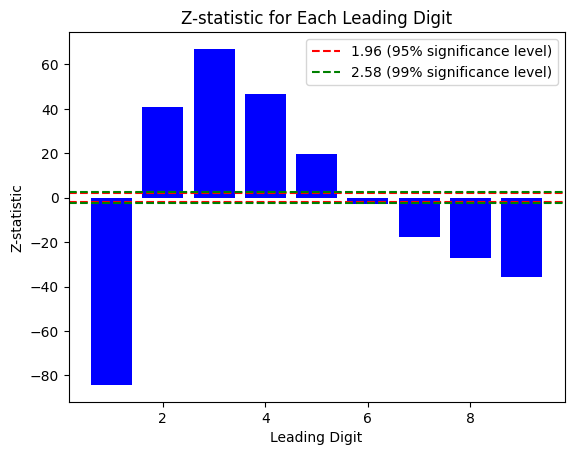

In [12]:
# Calculate the Z-statistic (standard deviations) for each leading digit
z_statistics = [(observed_ratios[i] - expected_frequencies[i]) / 
                np.sqrt(expected_frequencies[i] * (1 - expected_frequencies[i]) / total_count) 
                for i in range(1, 10)]

for i, z in enumerate(z_statistics, start=1):
    print(f"Z-statistic for {i}: {z}")

# visulised the z-statistic
plt.bar(range(1,10), z_statistics, color='blue')
plt.axhline(y=1.96, color='r', linestyle='--', label='1.96 (95% significance level)')
plt.axhline(y=-1.96, color='r', linestyle='--')
plt.axhline(y=2.58, color='g', linestyle='--', label='2.58 (99% significance level)')
plt.axhline(y=-2.58, color='g', linestyle='--')
plt.xlabel('Leading Digit')
plt.ylabel('Z-statistic')
plt.title('Z-statistic for Each Leading Digit')
plt.legend()
plt.show()

#### MAD only

In [13]:
# Calculate the expected frequency for each leading digit under the assumption of Benford's Law
probability_distribution_ben = {i: math.log10(1 + 1/i) for i in range(1, 10)}

# Calculate the frequency for each leading digit under the observed dataset
probability_distribution_obv = {k: v / total_count for k, v in observed_frequencies.items()}

# Compute the MAD
MAD = sum(abs(probability_distribution_obv[d] - probability_distribution_ben[d]) for d in range(1, 10)) / 9
print('MAD: ', MAD)

MAD:  6.841402750074055e-05
